In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
df = pd.read_csv(r"C:\\ML Project\\AI_and_ML\\archive (1)\\spam.csv", encoding='ISO-8859-1')

In [5]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

In [7]:
df=df[['v1', 'v2']].rename(columns={'v1':'label', 'v2':'message'})

In [8]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [10]:
df['message_length'] = df['message'].apply(len)

In [11]:
y=df[['label']]

In [14]:


vect = CountVectorizer()
x = vect.fit_transform(df['message'])  # Transforms text to numeric matrix
# tfidf = TfidfVectorizer(stop_words='english')
# x = tfidf.fit_transform(df['message'])

In [15]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.1, random_state=42)

In [16]:
lr=LogisticRegression()

In [17]:
lr.fit(x_train, y_train)

C:\Users\srina\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [18]:
y_pre=lr.predict(x_test)

In [19]:
accuracy=accuracy_score(y_test, y_pre)
accuracy*100

98.56630824372759

In [20]:
cm=confusion_matrix(y_test, y_pre)
cm

array([[491,   0],
       [  8,  59]])

In [21]:
import matplotlib.pyplot as plt

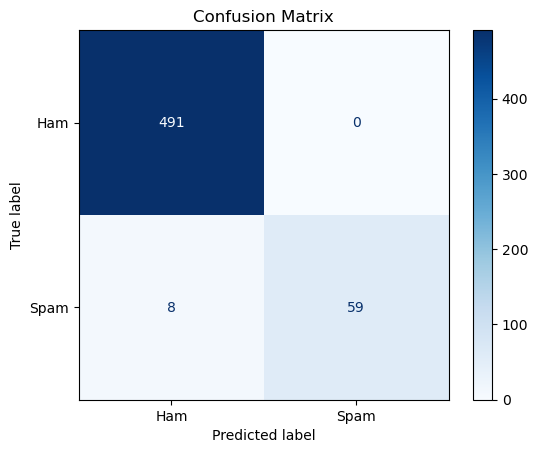

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()